<div style="background-color: #EEEEEE; padding: 10px;">
    <h1 style="font-size: 24px;">Airbus Ship Detection: Exploratory Data Analysis</h1>
</div>

<div style="background-color: #BCBCBC; padding: 10px;">
    <h1 style="font-size: 24px;">Importing Modules</h1>
</div>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np

<div style="background-color: #BCBCBC; padding: 10px;">
    <h1 style="font-size: 18px;">Number and Shape of Images in the Dataset</h1>
</div>

In [2]:
# Path to the directory containing images
DATA_PATH = "/home/nataliia/Documents/cv_ships/train_v2"

In [3]:
# Get the list of image files in the data directory
images = os.listdir(DATA_PATH)

# Print the number of images in the dataset
print("Number of images in the dataset:", len(images))

Number of images in the dataset: 192557


In [4]:
# Display the shapes of the images and check if they are all the same or different

# Set to store unique image shapes
unique_shapes = set()

# Loop through each image file in the data directory
for image_file in os.listdir(DATA_PATH):
    # Construct the full path to the image file
    image_path = os.path.join(DATA_PATH, image_file)

    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Get the shape of the image
    image_shape = image.shape if image is not None else None

    # Add the shape to the set if it is not None
    if image_shape is not None:
        unique_shapes.add(image_shape)

# Print the unique image shapes
print("Unique Image Shapes:")
for shape in unique_shapes:
    print(shape)

Premature end of JPEG file


Unique Image Shapes:
(768, 768, 3)


<div style="background-color: #BCBCBC; padding: 10px;">
    <h1 style="font-size: 18px;">Printing out Sample Images from the Dataset</h1>
</div>

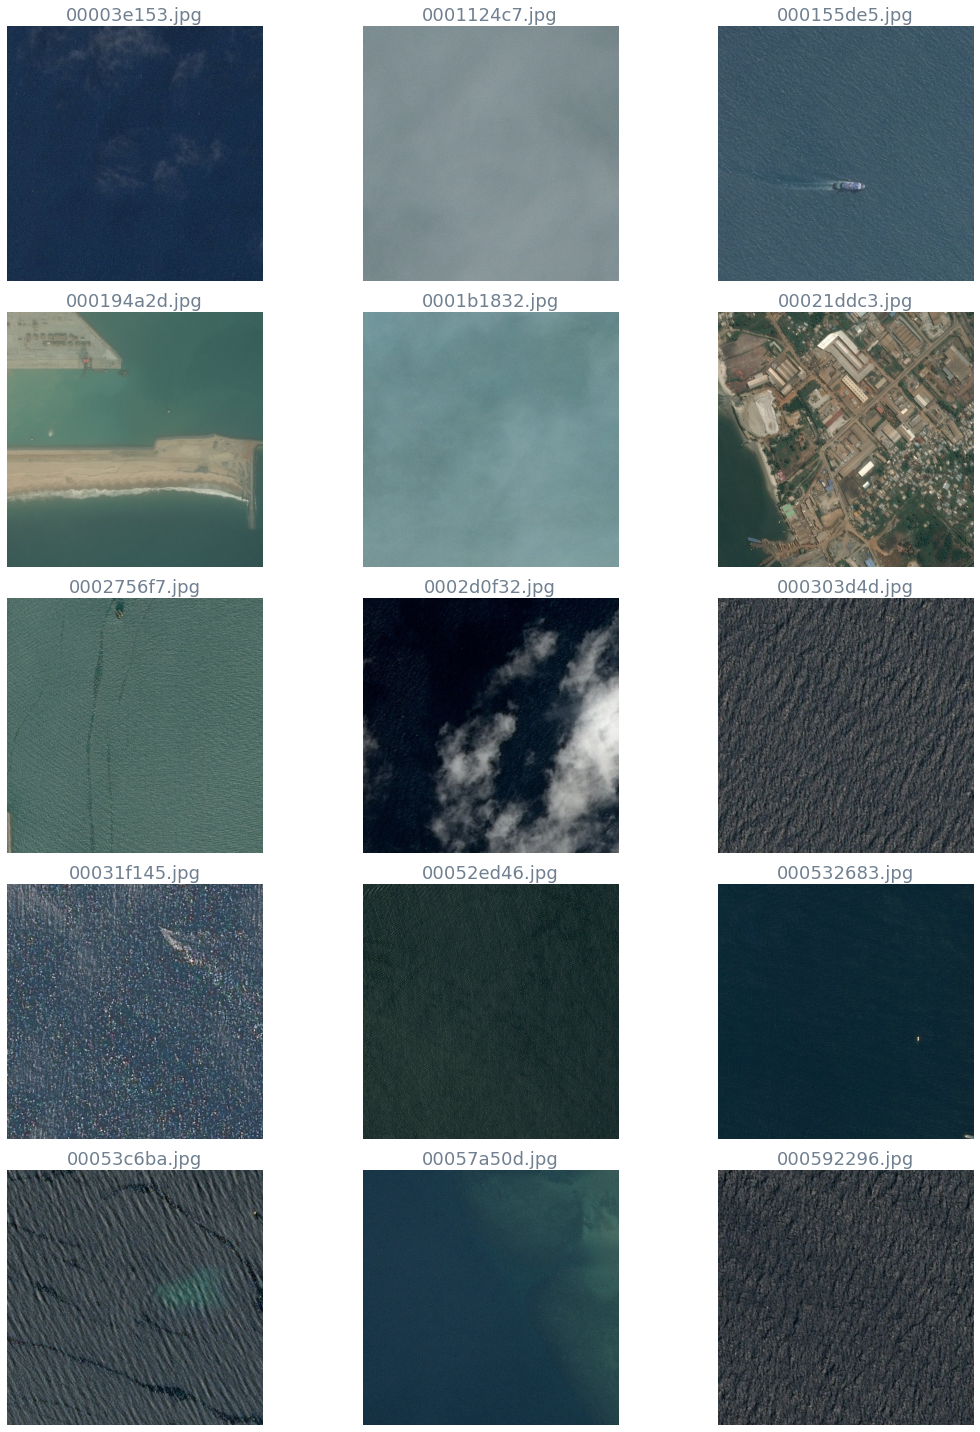

In [5]:
# Get the list of image files in the data directory and sort them
images = sorted(os.listdir(DATA_PATH))

# Create a figure 
figure = plt.figure(figsize=(16, 20))

# Set 15 first images to display
num_of_images = min(15, len(images))

# Iterate through the  images
for index in range(num_of_images):
    # Construct the full path to the image file
    image_path = os.path.join(DATA_PATH, images[index])

    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Check if the image is read successfully
    if image is not None:
        # Display the image
        plt.subplot(5, 3, index + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        # Add the file name as a title 
        plt.title(images[index], fontsize=18, color = 'slategray')
    else:
        print(f"Error reading image: {image_path}")
# Adjust layout for better spacing
plt.tight_layout()  

<div style="background-color: #BCBCBC; padding: 10px;">
    <h1 style="font-size: 18px;">Exploration of the File with Images Description </h1>
</div>

In [6]:
# Read the description file
description_file = pd.read_csv("/home/nataliia/Documents/cv_ships/train_ship_segmentations_v2.csv")
description_file.head(29)

ImageId                                      EncodedPixels
0   00003e153.jpg                                                NaN
1   0001124c7.jpg                                                NaN
2   000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3   000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4   000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5   000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
6   000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7   000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...
8   0001b1832.jpg                                                NaN
9   00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...
10  00021ddc3.jpg  101361 1 102128 3 102896 4 103663 6 104430 9 1...
11  00021ddc3.jpg  74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...
12  00021ddc3.jpg  74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...
13  00021ddc3.jpg  150423 2 151190 3 151958 3 152726 4 153495 3 1...
14  00021ddc3.jpg  139644 2 140408 6 141174 9 141942 9 142711 6 1...
15  00021ddc3.jpg  75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...
16  00021ddc3.jpg  86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...
17  00021ddc3.jpg  95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...
18  0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...
19  0002756f7.jpg  248878 1 249645 4 250413 6 251180 9 251948 10 ...
20  0002d0f32.jpg                                                NaN
21  000303d4d.jpg                                                NaN
22  00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...
23  00052ed46.jpg                                                NaN
24  000532683.jpg  458957 14 459725 14 460493 14 461261 14 462029...
25  000532683.jpg  567543 2 568309 4 569077 5 569846 4 570614 5 5...
26  00053c6ba.jpg  565382 3 566144 9 566909 12 567677 13 568445 1...
27  00057a50d.jpg                                                NaN
28  000592296.jpg                                                NaN

In [7]:
# Find the number of the images with ships and without ships

# Filter images with ships
ships = description_file[~description_file.EncodedPixels.isna()].ImageId.unique()

# Filter images without ships
without_ships = description_file[description_file.EncodedPixels.isna()].ImageId.unique()

# Print the number of images with ships and without ships
print(f"Number of images with ships: {len(ships)}")
print(f"Number of images without ships: {len(without_ships)}")

Number of images with ships: 42556
Number of images without ships: 150000


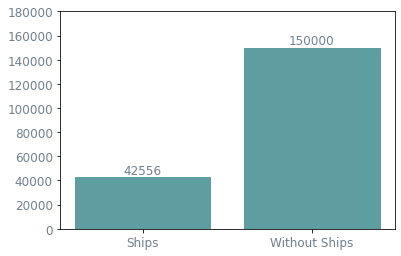

In [8]:
# Plot the bar chart with the number of classes

# Get the counts
num_ships = len(ships)
num_without_ships = len(without_ships)

# Plot the bar chart
fig, ax = plt.subplots()
bars = ax.bar([
    'Ships', 
    'Without Ships'],
    [num_ships, 
     num_without_ships], 
    color='slategray'
)

# Set the color of labels 
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_color('slategray')
    label.set_fontsize(12)

# Set the color of bars 
for bar in bars:
    bar.set_color('cadetblue')

# Display the counts on the top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval, 
             round(yval), 
             ha='center', 
             va='bottom', 
             color='slategray',
             fontsize=12
            )

# Set y-axis limits
ax.set_ylim(0, 180000);

In [9]:
# Find the number of ships on the images

# Group by 'ImageId' and apply aggregation functions
labels_df = description_file.groupby('ImageId').agg(
    Labels=('EncodedPixels', lambda x: 'Ships' if not x.isna().all() else 'Without_ships'),
    NumShips=('EncodedPixels', lambda x: x.notna().sum()))

labels_df.head(15)

Labels  NumShips
ImageId                               
00003e153.jpg  Without_ships         0
0001124c7.jpg  Without_ships         0
000155de5.jpg          Ships         1
000194a2d.jpg          Ships         5
0001b1832.jpg  Without_ships         0
00021ddc3.jpg          Ships         9
0002756f7.jpg          Ships         2
0002d0f32.jpg  Without_ships         0
000303d4d.jpg  Without_ships         0
00031f145.jpg          Ships         1
00052ed46.jpg  Without_ships         0
000532683.jpg          Ships         2
00053c6ba.jpg          Ships         1
00057a50d.jpg  Without_ships         0
000592296.jpg  Without_ships         0

In [10]:
labels_df.describe()

NumShips
count  192556.000000
mean        0.424412
std         1.199094
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000

/home/nataliia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nataliia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nataliia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


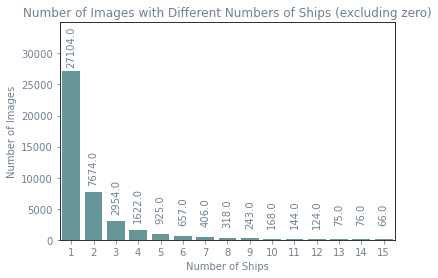

In [11]:
# Plot bars with different number of ships

# Filter out rows where 'NumShips' is zero
non_zero_counts = labels_df[labels_df['NumShips'] > 0]

# Countplot for the number of ships in each image excluding zero
ax = sns.countplot(x='NumShips', data=non_zero_counts, color='cadetblue')

# Set maximum value on the y-axis
ax.set_ylim(0, 35000)

# Set y-axis ticks at appropriate intervals
ax.set_yticks([i * 5000 for i in range(7)])

# Set labels and title with slategray color
ax.set_xlabel('Number of Ships', color='slategray')
ax.set_ylabel('Number of Images', color='slategray')
ax.set_title(
    'Number of Images with Different Numbers of Ships (excluding zero)', 
    color='slategray'
)

# Set ticks on the x-axis with slategray color
ax.tick_params(axis='x', colors='slategray')
ax.tick_params(axis='y', colors='slategray')

# Add count labels above each bar with vertical text
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha='center', 
        va='center', 
        xytext=(0, 25), 
        textcoords='offset points', 
        rotation=90,
        color='slategray'
    );

<div style="background-color: #BCBCBC; padding: 10px;">
    <h1 style="font-size: 18px;">Masking Images and Printing out the Original and the Masked</h1>
</div>

In [12]:
# Masking the ships on images

def rle_decode(encoded_pixels: str, shape: tuple) -> np.ndarray:
    """
    Decode the run-length encoded pixels and return a binary mask.

    Parameters:
    - encoded_pixels (str): A string representing run-length encoded pixels.
    - shape (tuple): A tuple representing the shape of the target mask (height, width).

    Returns:
    - numpy.ndarray: A binary mask with shape (width, height), where 255 indicates the foreground (white).
    """
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    encoded_pixels = list(map(int, encoded_pixels.split()))

    # Check if the length of encoded_pixels is even
    if len(encoded_pixels) % 2 != 0:
        raise ValueError("Invalid encoded pixels format")

    for i in range(0, len(encoded_pixels), 2):
        start = encoded_pixels[i] - 1  # RLE coordinates are 1-indexed
        length = encoded_pixels[i + 1]
        mask[start:start + length] = 255  # Use 255 for white foreground

    return mask.reshape((shape[1], shape[0])).T  # Transpose to match the image dimensions

# Path to the directory to save masked images
save_dir = "/home/nataliia/Documents/cv_ships/masked_images"

# Create the directory 
os.makedirs(save_dir, exist_ok=True)

# Group the DataFrame by 'ImageId'
grouped_df = description_file.groupby('ImageId')

# Iterate over groups
for image_id, group in grouped_df:
    # Read the original image
    image_path = os.path.join(DATA_PATH, image_id)
    original_image = cv2.imread(image_path)

    # Iterate over rows in the group
    for _, row in group.iterrows():
        # Check if EncodedPixels is not NaN
        if not pd.isna(row['EncodedPixels']):
            shape = original_image.shape[:2]
            mask = rle_decode(row['EncodedPixels'], shape)
            # Apply the mask directly to the original image with light orange color
            original_image[mask == 255] = [0, 165, 255]  
            
    # Save the result in the new directory
    result_filename = f"{image_id}"
    result_path = os.path.join(save_dir, result_filename)
    cv2.imwrite(result_path, original_image)

Premature end of JPEG file


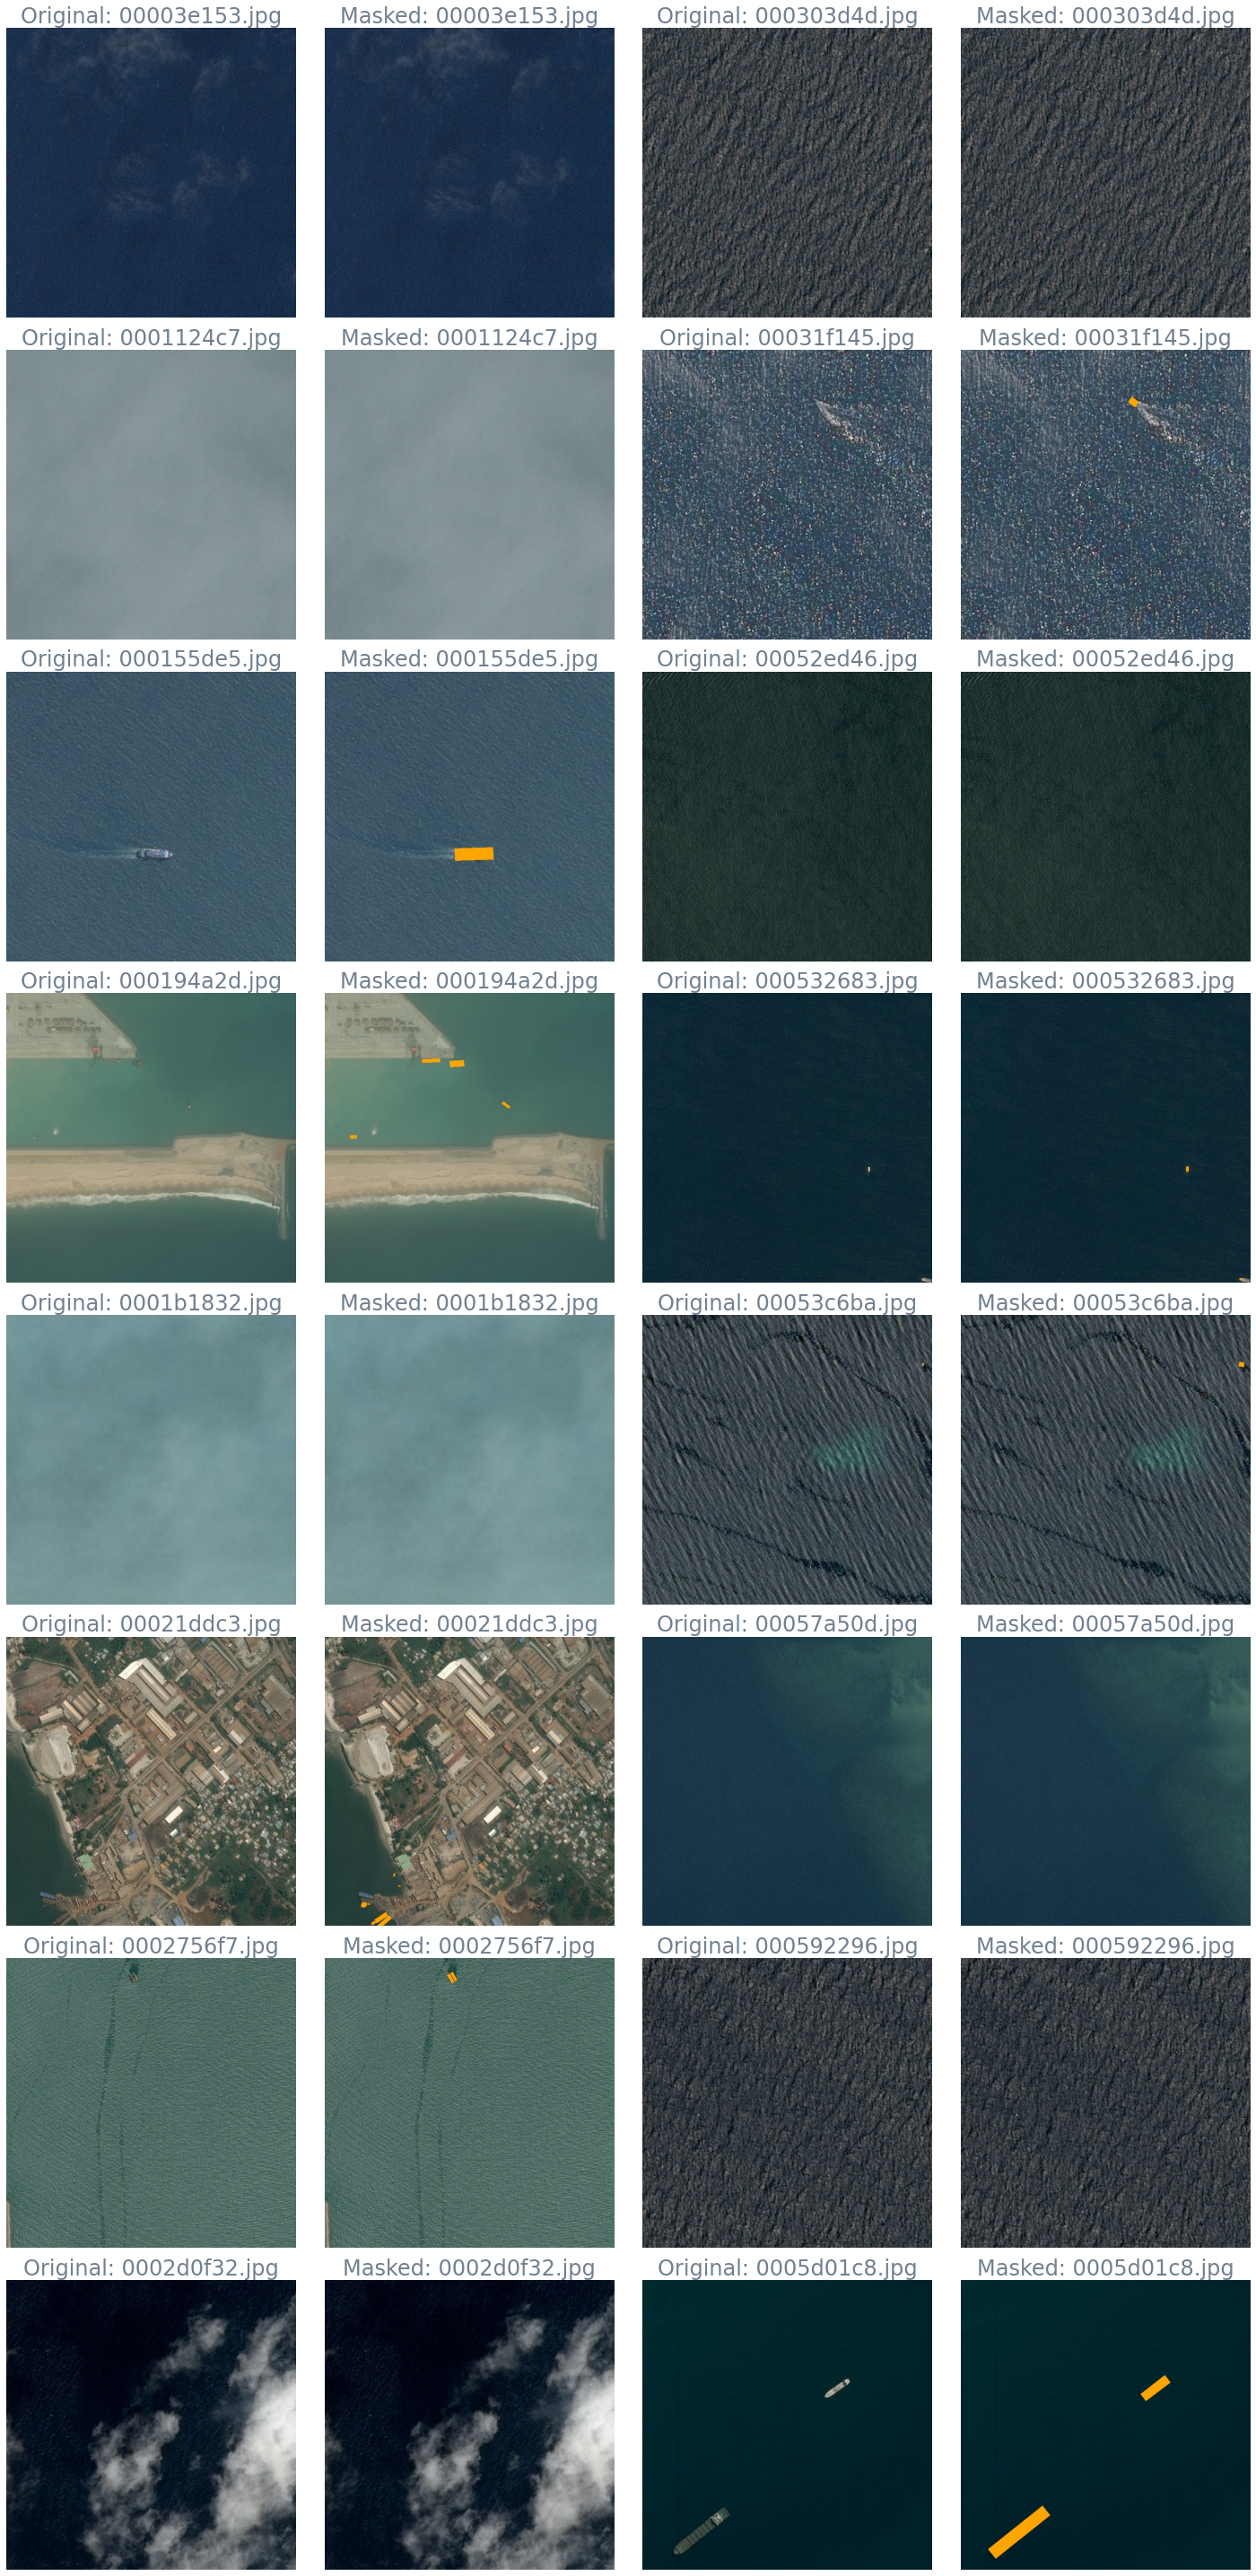

In [17]:
# Visualize original and masked images

# Path to the directory with masked images
masked_images_dir = "/home/nataliia/Documents/cv_ships/masked_images"

original_images = sorted(os.listdir(DATA_PATH))
masked_images = sorted(os.listdir(masked_images_dir))

# Create a figure 
figure, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))

# Iterate through the first 15 images
for index in range(min(8, len(original_images))):
    # Construct the full paths to the original and masked images
    original_image_path = os.path.join(DATA_PATH, original_images[index])
    masked_image_path = os.path.join(masked_images_dir, masked_images[index])

    # Read the original and masked images 
    original_image = cv2.imread(original_image_path)
    masked_image = cv2.imread(masked_image_path)

    # Check if the images are read successfully
    if original_image is not None and masked_image is not None:
        # Display the images: original, masked, original, masked
        axes[index, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        axes[index, 0].set_title(
            f"Original: {original_images[index]}", 
            fontsize=24, 
            color='slategray'
        )
        axes[index, 0].axis('off')

        axes[index, 1].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        axes[index, 1].set_title(
            f"Masked: {masked_images[index]}", 
            fontsize=24, 
            color='slategray'
        )
        
        axes[index, 1].axis('off')

        # Display the next original and masked images
        if index + 8 < len(original_images):
            next_original_image_path = os.path.join(
                DATA_PATH, 
                original_images[index + 8]
            )
            next_masked_image_path = os.path.join(masked_images_dir, masked_images[index + 8])

            next_original_image = cv2.imread(next_original_image_path)
            next_masked_image = cv2.imread(next_masked_image_path)

            axes[index, 2].imshow(cv2.cvtColor(next_original_image, cv2.COLOR_BGR2RGB))
            axes[index, 2].set_title(
                f"Original: {original_images[index + 8]}", 
                fontsize=24,
                color='slategray'
            )
            axes[index, 2].axis('off')

            axes[index, 3].imshow(cv2.cvtColor(next_masked_image, cv2.COLOR_BGR2RGB))
            axes[index, 3].set_title(
                f"Masked: {masked_images[index + 8]}", 
                fontsize=24,
                color='slategray'
            )
            axes[index, 3].axis('off')

plt.tight_layout();

<div style="background-color: #EEEEEE; padding: 20px; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.2); color: black;">
    <h1 style="font-size: 20px; margin-bottom: 10px;"><u>CONCLUSIONS:</u></h1>
    <p style="font-size: 14px; line-height: 1.5;">
        <b>- The dataset contains images of the same shape;</b>
        <br><br>
        <b>- It could be seen that the dataset contains images without ships (NaN in 'EncodedPixels') and images with multiple ships; 
        <br><br>
        <b>-The dataset is heavily unbalanced - both in terms of the number of images with ships and without ships, and in the different amounts of ships on various images. 
    </p>